In [333]:
pip install pycryptodome



Source node: 10
Target node: 1

Shortest path between nodes 10 and 1: [10, 11, 12, 16, 15, 14, 1]
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


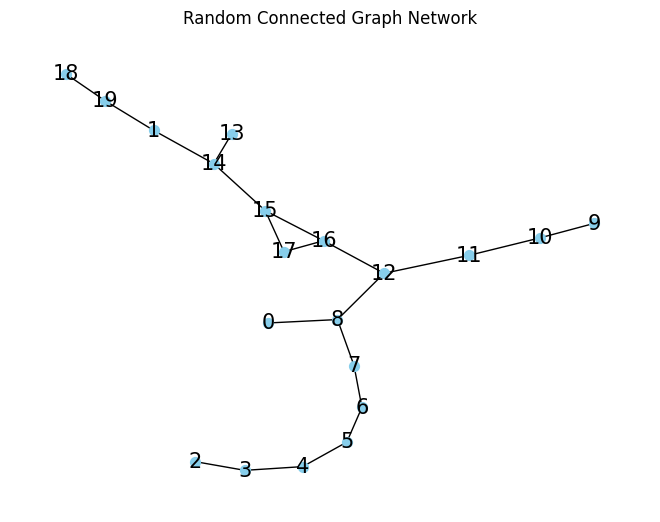

In [334]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pprint

pp = pprint.PrettyPrinter(indent=4)

def list_to_map(input_list):
    return {index: value for index, value in enumerate(input_list)}

def generate_payer_payee(n):
    if n <= 1:
        raise ValueError("n must be greater than 1")

    num1 = random.randint(0, n - 1)
    num2 = random.randint(0, n - 1)

    while num1 == num2 or abs(num1 - num2) < 4:
        num2 = random.randint(0, n - 1)

    return num1, num2

def create_and_display_random_connected_graph(n):
    # Create a connected random graph with n nodes
    G = nx.connected_watts_strogatz_graph(n, k=3, p=0.2)
    # Display the graph
    #Simulate payments

    # generate random source and target nodes
    source , target = generate_payer_payee(n)
    print("\nSource node:", source)
    print("Target node:", target)

    # Find a path between nodes source and target
    path = nx.shortest_path(G, source=source, target=target)
    print(f"\nShortest path between nodes {source} and {target}: {path}")

    # Payment path stored in map
    payment_path = list_to_map(path)

    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    adjacency_matrix_list = adjacency_matrix.tolist()
    print(adjacency_matrix)
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=15, font_weight="normal")
    plt.title("Random Connected Graph Network")
    plt.show()

    return G, source, target, adjacency_matrix_list, payment_path


# Example usage:
num_of_nodes = 20  # Number of nodes
G, payer, payee, network_graph, payment_path = create_and_display_random_connected_graph(num_of_nodes)
# print(type(G))
# print(type(payer))
# print(type(payee))
# print(type(network_graph))
# print(type(payment_path))

# this n is used later, by initialised to users_in_path
n = 0

# making copy of original network data to re-run simulation on same network
G_org, payer_org, payee_org, network_graph_org, payment_path_org = G.copy(), payer, payee, network_graph.copy(), payment_path.copy()

In [335]:
print(payment_path)

# Finding actual number of users from the complete network which will take part in multi-hop payment
users_in_path = len(payment_path)
print(f"\nNumber of nodes in path : {users_in_path}")

users_in_path_org = users_in_path

{0: 10, 1: 11, 2: 12, 3: 16, 4: 15, 5: 14, 6: 1}

Number of nodes in path : 7


In [336]:
def generate_faulty_nodes_map(n, percentage_of_ones):
    if not 0 <= percentage_of_ones <= 100:
        raise ValueError("Percentage must be between 0 and 100")

    # Calculate the number of ones to be generated
    num_ones = int(n * percentage_of_ones / 100)

    # Create the map with all zeros
    faulty_map = {}

    # Assign ones randomly
    ones_indices = random.sample(range(n), num_ones)
    for index in range(n):
        faulty_map[index] = 1 if index in ones_indices else 0

    return faulty_map


# Percentage of faulty nodes
percentage_of_faulty_nodes = 0
faulty_map = generate_faulty_nodes_map(num_of_nodes, percentage_of_faulty_nodes)
faulty_map[payer] = 0
faulty_map[payee] = 0
print("Generated faulty map:")
print(faulty_map)

# print(type(faulty_map))
faulty_map_org = faulty_map.copy()

Generated faulty map:
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0}


In [337]:
# Re-initialising with the original data for simulating the same environment
G, payer, payee, network_graph, payment_path = G_org.copy(), payer_org, payee_org, network_graph_org.copy(), payment_path_org.copy()
users_in_path = users_in_path_org
faulty_map = faulty_map_org.copy()

print(payment_path)

{0: 10, 1: 11, 2: 12, 3: 16, 4: 15, 5: 14, 6: 1}


In [338]:
import os
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.primitives.asymmetric import rsa, padding as asymmetric_padding
from cryptography.hazmat.primitives.ciphers import Cipher
from cryptography.hazmat.primitives.ciphers.algorithms import AES
from cryptography.hazmat.primitives.ciphers.modes import CBC
from cryptography.hazmat.primitives.hashes import SHA256

def generate_user_keys(user_list):
    user_keys = {}
    for user in user_list:
        # Generate private key for each user
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048
        )
        # Extract public key from private key
        public_key = private_key.public_key()
        # Store public-private key pair in the map
        user_keys[user] = (public_key, private_key)
    return user_keys

def hybrid_encrypt(plaintext, public_key):

    # Pad the plaintext
    pkcs7_padder = padding.PKCS7(AES.block_size).padder()
    padded_plaintext = pkcs7_padder.update(plaintext) + pkcs7_padder.finalize()

    # Generate new random AES-256 key
    key = os.urandom(256 // 8)

    # Generate new random 128 IV required for CBC mode
    iv = os.urandom(128 // 8)

    # AES CBC Cipher
    aes_cbc_cipher = Cipher(AES(key), CBC(iv))

    # Encrypt padded plaintext
    ciphertext = aes_cbc_cipher.encryptor().update(padded_plaintext)

    # Encrypt AES key
    oaep_padding = asymmetric_padding.OAEP(mgf=asymmetric_padding.MGF1(algorithm=SHA256()), algorithm=SHA256(), label=None)
    cipherkey = public_key.encrypt(key, oaep_padding)

    return {'iv': iv, 'ciphertext': ciphertext}, cipherkey


def hybrid_decrypt(ciphertext, cipherkey, private_key):

    # Decrypt AES key
    oaep_padding = asymmetric_padding.OAEP(mgf=asymmetric_padding.MGF1(algorithm=SHA256()), algorithm=SHA256(), label=None)
    recovered_key = private_key.decrypt(cipherkey, oaep_padding)

    # Decrypt padded plaintext
    aes_cbc_cipher = Cipher(AES(recovered_key), CBC(ciphertext['iv']))
    recovered_padded_plaintext = aes_cbc_cipher.decryptor().update(ciphertext['ciphertext'])

    # Remove padding
    pkcs7_unpadder = padding.PKCS7(AES.block_size).unpadder()
    recovered_plaintext = pkcs7_unpadder.update(recovered_padded_plaintext) + pkcs7_unpadder.finalize()

    return recovered_plaintext


# if __name__ == "__main__":

#     # Recipient's private key
#     private_key = rsa.generate_private_key(
#         public_exponent=65537,
#         key_size=2048
#     )

#     # Public key to make available to sender
#     public_key = private_key.public_key()

#     # Plaintext to send hybrid encrypted
#     plaintext = b'Fundamental Cryptography in Python'

#     # Hybrid encrypt plaintext
#     print(plaintext)
#     ciphertext, cipherkey = hybrid_encrypt(plaintext, public_key)
#     print(ciphertext['ciphertext'])
#     print(cipherkey)
#     # Hybrid decrypt ciphertext
#     recovered_plaintext = hybrid_decrypt(ciphertext, cipherkey, private_key)
#     print(recovered_plaintext)
#     assert (recovered_plaintext == plaintext)

user_keys store the public and private keys for all users


---



In [339]:
import time


In [340]:
def generate_users_and_ids(n):
    """
    Generate an array of user IDs and user ID numbers based on the number of users (n).

    Args:
    - n: Number of users from payer to payee including them.

    Returns:
    - users: Array of user IDs.
    - user_id: Array of user ID numbers.
    """
    users = [f'U{i}' for i in range(n)]
    user_id = list(range(n))
    return users, user_id

# n=50 #number of users from payer to payee including them
n = users_in_path
users, user_id = generate_users_and_ids(n)
user_keys = generate_user_keys(users)
print(users)
print(user_id)
pp.pprint(user_keys)

['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6']
[0, 1, 2, 3, 4, 5, 6]
{   'U0': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff74dd70>,
              <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff8d6bd0>),
    'U1': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff71e0d0>,
              <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff74e9d0>),
    'U2': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff74e6f0>,
              <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff74e450>),
    'U3': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff74ddd0>,
              <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPrivateKey object at 0x7ed4ff74e510>),
    'U4': (   <cryptography.hazmat.bindings._rust.openssl.rsa.RSAPublicKey object at 0x7ed4ff74e170>,
         

U0 generates random values

In [341]:
import random
import sympy

def generate_large_prime(bits):
    """
    Generate a large prime number.

    Parameters:
        bits (int): Number of bits for the prime number.

    Returns:
        int: A large prime number.
    """
    return sympy.randprime(2**(bits-1), 2**bits)

def generate_random_values(q, count):
    """
    Generate random values in Zq.

    Parameters:
        q (int): A large prime number.
        count (int): Number of random values to generate.

    Returns:
        list: A list of random values in Zq.
    """
    return [random.randint(0, q-1) for _ in range(count)]

# Generate a large prime number
bits = 100  # You can adjust the number of bits as needed
q = generate_large_prime(bits)
print("Large prime q:", q)

# Generate random values y0 to y4 in Zq
random_values = generate_random_values(q, n-1)
# y0, y1, y2, y3, y4 = random_values
for i, value in enumerate(random_values):
    globals()[f"y{i}"] = value
print("Random values y0 to yn-1 in Zq")
print(random_values)


Large prime q: 754571965577740970443026380791
Random values y0 to yn-1 in Zq
[562629450212219771141563043437, 701372956885459576780547469429, 572363068689987442523502258651, 75728287476260617851154624368, 171782676690312583101439105881, 126869349548909535780809592154]


In [342]:
def modular_exponentiation(base, exponent, modulus):
    """
    Perform modular exponentiation: (base^exponent) mod modulus.

    Parameters:
        base (int): The base.
        exponent (int): The exponent.
        modulus (int): The modulus.

    Returns:
        int: The result of modular exponentiation.
    """
    result = 1
    base = base % modulus
    while exponent > 0:
        if exponent % 2 == 1:
            result = (result * base) % modulus
        exponent = exponent // 2
        base = (base * base) % modulus
    return result

def homomorphic_function(x):
    """
    Compute F(x) = g^x mod p, where g = 3 and p = 17.

    Parameters:
        x (int): The input value.

    Returns:
        int: The result of F(x).
    """
    g = 3
    p = q
    return modular_exponentiation(g, x, p)

In [343]:
def compute_Y(random_values, homomorphic_function, q):
    Y_values = []
    Y_prev = homomorphic_function(random_values[0])  # Initialize Y0
    Y_values.append(Y_prev)
    for value in random_values[1:]:
        Y_current = (Y_prev * homomorphic_function(value)) % q
        Y_values.append(Y_current)
        Y_prev = Y_current
    return Y_values

In [344]:
setup_time = 0
lock_time = 0
release_time = 0
setup_overhead = 0
message_overhead = 0
release_overhead = 0
Locks_generated = 0
path_recomputed = 0

In [345]:
# Computing Y values
start_time = time.time()
Y_values = compute_Y(random_values, homomorphic_function, q)

for i, value in enumerate(Y_values):
    globals()[f"Y{i}"] = value
    print(f"Y{i} =", value)
end_time = time.time()
setup_time = end_time - start_time



Y0 = 480193366711248204259204811929
Y1 = 704775826539878108642849007419
Y2 = 647219698464527651480079453668
Y3 = 184867968269547334212953620900
Y4 = 19340515507084691090159353796
Y5 = 231275291337327866001372635171



kn generation for payee

In [346]:
def compute_kn(y_values):
    """
    Compute kn as the sum of y_values modulo q.

    Parameters:
        y_values (list): List of y values.

    Returns:
        int: kn = sum(y_values)
    """
    return sum(y_values)

start_time = time.time()
kn = compute_kn(random_values)
end_time = time.time()
setup_time =setup_time + (end_time - start_time)

print(kn)
print(homomorphic_function(kn))
print(Y_values[-1])


2210745789503149527179016093920
231275291337327866001372635171
231275291337327866001372635171


In [347]:

def generate_messages(Y_values, random_values, user_id):
    """
    Generate messages based on the given formula for users 1 to N-2.

    Args:
    - Y_values: List of Y values for users 0 to N-1.
    - random_values: List of y values for users 0 to N-1.
    - user_id: The current user ID for whom to generate the message.

    Returns:
    - messages: List of messages for users 1 to N-2.
    """

    N = len(Y_values)
    messages = []

    for i in range(1, N):
        Y_prev = Y_values[i - 1]
        Y_current = Y_values[i]
        y_current = random_values[i]
        message = ""
        # message = Y_prev + Y_current + y_current + (user_id + 1)
        message = str(Y_prev) + ":::" + str(Y_current) + ":::" + str(y_current) + ":::" + str(user_id[i+1])
        messages.append(message)

    message = str(Y_values[N-1]) + ":::" + str(kn)
    messages.append(str(message))

    return messages


start_time = time.time()

messages = generate_messages(Y_values, random_values, user_id)
end_time = time.time()
setup_time =setup_time + (end_time - start_time)
print("Generated messages:", messages)
pp.pprint(messages)
print(len(messages))


Generated messages: ['480193366711248204259204811929:::704775826539878108642849007419:::701372956885459576780547469429:::2', '704775826539878108642849007419:::647219698464527651480079453668:::572363068689987442523502258651:::3', '647219698464527651480079453668:::184867968269547334212953620900:::75728287476260617851154624368:::4', '184867968269547334212953620900:::19340515507084691090159353796:::171782676690312583101439105881:::5', '19340515507084691090159353796:::231275291337327866001372635171:::126869349548909535780809592154:::6', '231275291337327866001372635171:::2210745789503149527179016093920']
[   '480193366711248204259204811929:::704775826539878108642849007419:::701372956885459576780547469429:::2',
    '704775826539878108642849007419:::647219698464527651480079453668:::572363068689987442523502258651:::3',
    '647219698464527651480079453668:::184867968269547334212953620900:::75728287476260617851154624368:::4',
    '184867968269547334212953620900:::19340515507084691090159353796:::1

Computing C1 by Payer(U0)

In [348]:
start_time = time.time()

Cdashi, cipherkey =  hybrid_encrypt(messages[n-2].encode(),user_keys[f'U{n-1}'][0])
for i in range(n-3, -1, -1):
    newmessage = messages[i].encode() + b"|||"+ Cdashi['iv'] +b"|||"+ Cdashi['ciphertext'] + b"|||" + cipherkey
    Cdashi, cipherkey = hybrid_encrypt(newmessage,user_keys[f'U{i+1}'][0])
C1= Cdashi
end_time = time.time()

setup_time =setup_time + (end_time - start_time)
# C1,cipherkey = hybrid_encrypt(newmessage,user_keys['U1'][0])
# print(C1)
# print(cipherkey)

U0 sends (Y0,C1) to U1

Lock Phase

In [349]:
import sys

In [350]:
start_time = time.time()
message_overhead = sys.getsizeof(Y0) + sys.getsizeof(C1)

In [351]:
# if payer is down
actual_node = payment_path[0]
if faulty_map[actual_node] == 1:
  raise RuntimeError("\n=> Transaction Failed - Payer Node is Down.")

In [352]:
Yfromprevuser = Y0

restart_loop = True
while restart_loop:
  restart_loop = False
  for i in range(1, n-1):

    # checking faulty ------------------------------------------------------------
    actual_node = payment_path[i]
    while faulty_map[actual_node] == 1:

      print("\nFaulty Node Detected.")
      path_recomputed = path_recomputed +1
      node = actual_node

      del faulty_map[node]

      for N in range(node+1, len(faulty_map)+1):
        faulty_map[N-1] = faulty_map.pop(N)

      G.remove_node(node)
      G = nx.connected_watts_strogatz_graph(G.number_of_nodes(), k=3, p=0.2)  # updating the network graph
      start_time = time.time()
      path = nx.shortest_path(G, source=payer, target=payee)
      payment_path = list_to_map(path)
      users_in_path = len(payment_path)
      n = users_in_path
      users, user_id = generate_users_and_ids(n)
      user_keys = generate_user_keys(users)
      random_values = generate_random_values(q, n-1)
      Y_values = compute_Y(random_values, homomorphic_function, q)
      for i, value in enumerate(Y_values):
        globals()[f"Y{i}"] = value
        print(f"Y{i} =", value)
      kn = compute_kn(random_values)
      messages = generate_messages(Y_values, random_values, user_id)
      Cdashi, cipherkey =  hybrid_encrypt(messages[n-2].encode(),user_keys[f'U{n-1}'][0])
      for i in range(n-3, -1, -1):
          newmessage = messages[i].encode() + b"|||"+ Cdashi['iv'] +b"|||"+ Cdashi['ciphertext'] + b"|||" + cipherkey
          Cdashi, cipherkey = hybrid_encrypt(newmessage,user_keys[f'U{i+1}'][0])

      C1= Cdashi
      end_time = time.time()
      setup_time =setup_time + (end_time - start_time)
      Yfromprevuser = Y0
      actual_node = payment_path[0]
      message_overhead = message_overhead + sys.getsizeof(Yfromprevuser) + sys.getsizeof(C1)

      print("\n### LOGS\n")
      print(path)
      pp.pprint(payment_path)
      pp.pprint(faulty_map)
      restart_loop = True
      break;
    #-----------------------------------------------------------------------------
    if restart_loop:
      break;

    print(f"\n\nUser {actual_node}")
    decrypted_message = hybrid_decrypt(C1, cipherkey, user_keys[f'U{i}'][1])
    print("Decrypted Message:- ")
    print(decrypted_message)
    decrpyted_message_decoded = decrypted_message.split(b'|||')
    messageForMe = decrpyted_message_decoded[0].decode()
    message_decoded = messageForMe.split(":::")
    print("Actual Message:-")
    print(message_decoded)
    Ydashprev = message_decoded[0]
    Ydashcurr = message_decoded[1]
    ycurr = message_decoded[2]
    idnext = message_decoded[3]

    #message for idnext
    newiv = decrpyted_message_decoded[1]
    newciphertext = decrpyted_message_decoded[2]
    newcipherkey = decrpyted_message_decoded[3]



    if int(Ydashprev) != int(Yfromprevuser) or int(Ydashcurr) != (int(Ydashprev)*homomorphic_function(int(ycurr)))%q:
      print("Abort")
    else:
      #setting lock
      print(f"User {i} accepting lock {i-1}")
      L0 = Yfromprevuser
      Locks_generated = Locks_generated + 1


    #send this info to nextid user
    Yfromprevuser = Ydashcurr
    C1 = {'iv': newiv, 'ciphertext': newciphertext}
    cipherkey = newcipherkey
    message_overhead = message_overhead + sys.getsizeof(Yfromprevuser) + sys.getsizeof(C1)



User 11
Decrypted Message:- 
b'480193366711248204259204811929:::704775826539878108642849007419:::701372956885459576780547469429:::2|||\x14P\xef|\xba`\xaf\xe3\xcd\xa5\xdbQ\xfb\x9f\x9a\xad|||\xdfN\xa0!+\xc8\xb7\xdd%(28^\xc8 B~\r\x1c\xce*\xf0\x8e6\xd7\xd1{\t0\x18\xc9\x8e0\xaes\xce=.\x0cX\x83j\x0b\xea\x84\xc3\xa1\xf9\xa0S2\x9d\xcf\xae\xc0\xad\xd6\xb2.\x98\xbb\xbb*\xa2`\xff\xb4\x15\x89_o\xf3\x95\xba1\x95\xc0\x1a^\xe3\x82\xba<\xf1"\xe3T\x81\x8e\x91\x93M\xdc\xe4\x8c\xc1\xcc\xa8\x97\x14\xb1\xba\xdc\xdf\xaa\xd5\xd3=\xe2\xeby\x03g\x7f\xee\x89\x08\xb5R\xa0gqt\x0e\x9f8\xc8 \xd3\xe2\xe3Fx\n\xbeJ\x9a\xbe\xf7\xe8\xd1\xb3T\xcf\x9el\x82\x86\x8fV\xc9\x15\xec\xde\x18\xdd\xbbI2\x84\xea\x9f\xec\xca\x7fM\x7fI\x01\x93\xd5\x9f\'\xee\x85\xf3\x19_Lw\xb7uW\x18\xcdwp\xaey]H<\x13\x8az\x9aY\xdb\xbc\xeb\x06d\xb3\xce\xb9\xa1\x00\x05\xc4\xfc\xae\x19\x03/\xf6\x01I\xa4\x9d\xb5\xf2f}LDni\x01p\x1b\xe8\xe1v:\x9a\x19\x14Gk\xf0]\xbb\x0e @\xf8\xcf\xd7n?5-\xb1L2-k\xfbF\x05/O\xef\xa4b\x99\xae\x8d\xcbc\xae\xaa\x1e4\xb0\x96\xcb

In [353]:
print(f"User {n-1}")

# if payee is down
actual_node = payment_path[n-1]
if faulty_map[actual_node] == 1:
  raise RuntimeError("\n=> Transaction Failed - Payee Node is Down.")


decrypted_message = hybrid_decrypt(C1, cipherkey, user_keys[f'U{n-1}'][1])
print("Decrypted Message:- ")
print(decrypted_message)
decrpyted_message_decoded = decrypted_message.split(b'|||')
messageForMe = decrpyted_message_decoded[0].decode()
message_decoded = messageForMe.split(":::")
print("Actual Message:-")
print(message_decoded)


Ydashprev = message_decoded[0]
Kn = message_decoded[1]

if int(Ydashprev) != int(Yfromprevuser) or int(Ydashprev) != int(homomorphic_function(int(Kn))):
  print("Abort")
else:
  #setting lock
  print(f"User {n-1} accepting lock {n-2}")
  L5 = Yfromprevuser
  Locks_generated = Locks_generated + 1


User 6
Decrypted Message:- 
b'231275291337327866001372635171:::2210745789503149527179016093920'
Actual Message:-
['231275291337327866001372635171', '2210745789503149527179016093920']
User 6 accepting lock 5


In [354]:
end_time = time.time()
lock_time =lock_time + (end_time - start_time)

Release Phase

In [355]:
release_overhead = sys.getsizeof(Kn)

In [356]:
start_time = time.time()

In [357]:
for i in range(n-2, -1,-1):
  print(f"U{payment_path[i+1]} sends K{i+1} to U{payment_path[i]} to release L{i}")
  if int(Y_values[i]) == int(homomorphic_function(int(Kn))):
    Kn = int(Kn) - (int(random_values[i])%int(q))
    release_overhead = release_overhead + sys.getsizeof(Kn)
    if i == 0:
      print("\n=> AMHL+ payment execution successfull");
  else:
    print("Abort")
    print("AMHL+ payment Failed")

U1 sends K6 to U14 to release L5
U14 sends K5 to U15 to release L4
U15 sends K4 to U16 to release L3
U16 sends K3 to U12 to release L2
U12 sends K2 to U11 to release L1
U11 sends K1 to U10 to release L0

=> AMHL+ payment execution successfull


In [358]:
end_time = time.time()
release_time =release_time + (end_time - start_time)

In [359]:
print("Setup Time:- ",setup_time)
print("Lock Time:-", lock_time)
print("Release Time:-", release_time)
print("\n")
print("Setup Overhead(in Bytes):-", setup_overhead)
print("Lock phase Overhead(in Bytes):-",message_overhead)
print("Release Overhead (in Bytes):- ", release_overhead)
print("\n")
print("Number Of Locks generated for payment", Locks_generated)
print("Number of times Path recomputed:- ",path_recomputed)

Setup Time:-  0.007519960403442383
Lock Time:- 0.07562875747680664
Release Time:- 0.02220940589904785


Setup Overhead(in Bytes):- 0
Lock phase Overhead(in Bytes):- 1826
Release Overhead (in Bytes):-  304


Number Of Locks generated for payment 6
Number of times Path recomputed:-  0
